In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"

In [3]:
df = pd.read_csv(data)
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
cols = ['ram', 'storage','screen','final_price']
cols

['ram', 'storage', 'screen', 'final_price']

<Axes: xlabel='final_price', ylabel='Count'>

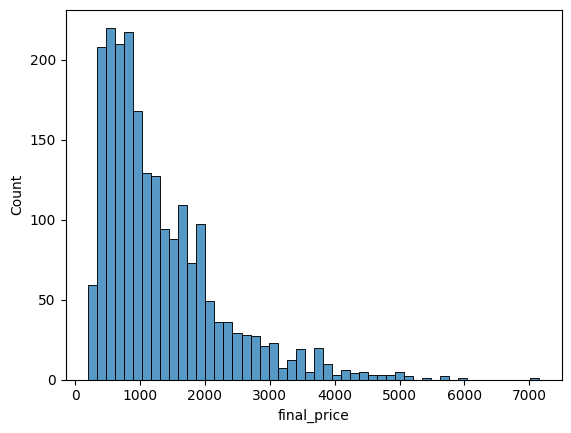

In [6]:
sns.histplot(df.final_price, bins=50)

In [7]:
df[cols].isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [8]:
med = df.ram.median()
med

np.float64(16.0)

In [9]:
n = len(df)
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)


In [10]:
idx

array([2003,  502,  896, ...,  501,  348,  382], shape=(2160,))

In [11]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val , n_train, n_test, n

(432, 1296, 432, 2160)

In [12]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
df_train.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
2003,MSI Creator 15 A10SF-018ES Intel Core i7-10875...,Refurbished,MSI,Creator,Intel Core i7,32,1000,SSD,RTX 2070,15.6,No,1592.89
502,Apple MacBook Air Apple M1/8GB/512GB SSD/GPU H...,New,Apple,MacBook Air,Apple M1,8,512,SSD,NaN,13.3,No,1349.00
896,HP 250 G8 Intel Core i5-1135G7/8 GB/512 GB SSD...,New,HP,250,Intel Core i5,8,512,SSD,NaN,15.6,No,549.00
356,ASUS ROG Strix G17 G713RS-LL042 AMD Ryzen 7 68...,New,Asus,ROG,AMD Ryzen 7,32,1000,SSD,RTX 3080,17.3,No,2999.00
499,MSI Prestige 16 A12UD-221XES Intel Core i7-128...,New,MSI,Prestige,Intel Core i7,16,1000,SSD,RTX 3050,16.0,No,1889.00


In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.shape, df_val.shape, df_test.shape

((1296, 12), (432, 12), (432, 12))

In [14]:
y_train = np.log1p(df_train.final_price)
y_test = np.log1p(df_test.final_price)
y_val = np.log1p(df_val.final_price)
y_train

0       7.373933
1       7.207860
2       6.309918
3       8.006368
4       7.544332
          ...   
1291    7.522941
1292    6.679272
1293    6.063808
1294    7.377759
1295    8.517195
Name: final_price, Length: 1296, dtype: float64

In [15]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [16]:
def prepare_X_0(df):
    base = cols.copy()
    base.remove('final_price')
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X
X = prepare_X_0(df_train)
X

array([[  32. , 1000. ,   15.6],
       [   8. ,  512. ,   13.3],
       [   8. ,  512. ,   15.6],
       ...,
       [   8. ,  128. ,   15.6],
       [  16. , 1000. ,   17.3],
       [  32. , 2000. ,   16. ]], shape=(1296, 3))

In [17]:
def train_linear_regression(x,y):
    ones = np.ones(x.shape[0])
    x = np.column_stack([ones,x])

    XTX = x.T.dot(x)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(x.T).dot(y)

    return w_full[0], w_full[1:]

In [18]:
def linear_regression(x,w):
    return x.dot(w)

In [19]:
def prepare_X_mean(df):
    base = cols.copy()
    base.remove('final_price')
    mean = df.screen.mean()
    df_num = df[base]
    df_num = df_num.fillna(mean)
    X = df_num.values
    return X


In [20]:
def rmse(y,y_pred):
    error = y-y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [21]:
X_train = prepare_X_0(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)
rmse_0 = rmse(y_val, y_pred).round(2)
rmse_0



np.float64(0.41)

In [22]:
X_train = prepare_X_mean(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
rmse_mean = rmse(y_val,y_pred).round(2)
rmse_mean

np.float64(0.41)

In [23]:
def train_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [24]:
r = [0, 0.01, 0.1, 1, 5, 10, 100]

for i in r:   
    X_train = prepare_X_0(df_train)
    w0,w = train_regression_reg(X_train, y_train,r=i)
    
    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    rmse_0 = rmse(y_val, y_pred).round(2)
    print(i , w0, w, rmse_0)

0 6.722879421950617 [ 0.02394976  0.00071616 -0.03558581] 0.41
0.01 6.7146312088587905 [ 0.02394539  0.00071578 -0.03502599] 0.41
0.1 6.641301891693225 [ 0.02390653  0.00071238 -0.03004902] 0.41
1 5.9877296903462724 [0.02356029 0.00068206 0.01430928] 0.42
5 4.168960069201653 [0.02259865 0.00059783 0.13774111] 0.49
10 3.0255569232238138 [0.02199722 0.00054509 0.21532374] 0.57
100 0.5303563684530987 [0.02078362 0.00043666 0.38415049] 0.77


In [25]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [26]:
def create_training_data(n_train, n_val, n_test, idx_order):
    df_train = df.iloc[idx_order[:n_train]]
    df_val = df.iloc[idx_order[n_train:n_train+n_val]]
    df_test = df.iloc[idx_order[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.final_price)
    y_val = np.log1p(df_val.final_price)
    y_test = np.log1p(df_test.final_price)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    return df_train, df_val, df_test, y_train, y_val, y_test


def calculate_seed(seed):
    rmse_data = []
    for i in seed:
        np.random.seed(i)
        shuffled_idx = idx.copy()
        np.random.shuffle(shuffled_idx)
        
        n_val = int(n * 0.2)
        n_test = int(n * 0.2)
        n_train = n - n_val - n_test

        df_train, df_val, df_test, y_train, y_val, y_test = create_training_data(n_train, n_val, n_test, shuffled_idx)
        
        X_train = prepare_X_0(df_train)
        w0, w = train_linear_regression(X_train, y_train)
        
        X_val = prepare_X_0(df_val)
        y_pred = w0 + X_val.dot(w)
        
        rmse_0 = rmse(y_val, y_pred).round(2)
        rmse_data.append(rmse_0)
        
        print(f"Seed {i}: RMSE = {rmse_0}")
    return rmse_data


In [27]:
rmse_values = calculate_seed(seed)
std = np.std(rmse_values).round(3)

Seed 0: RMSE = 0.42
Seed 1: RMSE = 0.44
Seed 2: RMSE = 0.42
Seed 3: RMSE = 0.44
Seed 4: RMSE = 0.45
Seed 5: RMSE = 0.46
Seed 6: RMSE = 0.44
Seed 7: RMSE = 0.45
Seed 8: RMSE = 0.48
Seed 9: RMSE = 0.42


In [45]:
df_train_full = pd.concat([df_train,df_val])
y_train_full = pd.concat([y_train,y_val])
df_train_full = df_train_full.reset_index(drop=True)
y_train_full = y_train_full.reset_index(drop=True)
y_train_full.shape , df_train_full.shape

((1728,), (1728, 11))

In [48]:
X_train = prepare_X_0(df_train_full)
w0, w = train_regression_reg(X_train, y_train_full,r=0.001)   

X_test = prepare_X_0(df_test)
y_pred = w0 + X_test.dot(w)
     
rmse_0 = rmse(y_test, y_pred).round(2)
rmse_0

np.float64(0.46)

In [61]:
cc = y_test.iloc[20].round(2)
np.expm1(cc)


np.float64(527.4773778776872)

In [63]:
test = np.array([8,512,0])
y_pred = w0 + test.dot(w).round(2)
np.expm1(y_pred)
rmse(cc,y_pred)

np.float64(1.0569074877439428)